In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [31]:
bias= 10
X, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, random_state=42, noise=10, coef=True)

In [32]:
print((coef, bias))

(array(41.74110031), 10)


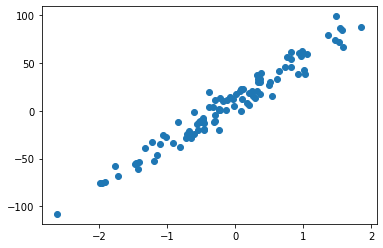

In [33]:
plt.scatter(X, y)

In [95]:
class LinearRegCustom:
    
    def __init__(self, lr=1):
        
        self.coef_ = 0
        self.intercept_ = 0
        self.__lr = lr
        
    def fit(self, X, y):
        
        ya = y.reshape([-1, 1])
        
        errors = []

        for i in range(50):
            yp = self.predict(X)
            delm = -((yp-ya)*X).mean()
            delc = -((yp-ya)).mean()
            
#             print(delm, delc)
            
            self.coef_ = self.coef_ + (delm*self.__lr)
            self.intercept_ = self.intercept_ + (delc*self.__lr)
            
            errors.append(((yp-ya) ** 2).mean())
            
        return errors
        
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
        

In [96]:
y.shape

(100,)

In [139]:
model = LinearRegCustom(lr=.11)

In [140]:
errors = model.fit(X, y)

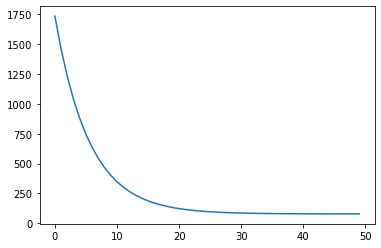

In [141]:
plt.plot(range(len(errors)), errors)

In [105]:
model.coef_

44.43716967096883

In [59]:
model.intercept_

11.165115320525445

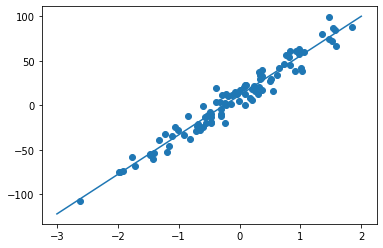

In [60]:
xp = np.linspace(-3, 2)

yp = model.coef_ * xp + model.intercept_

plt.scatter(X, y)
plt.plot(xp, yp)